## Proyek Analisis Data : Bike Sharing 

+ Nama          : Akbar Maulana
+ Email         : m011d4ky2407@bangkit.academy
+ ID Dicoding   : akbarmaulana110902



### Menentukan Pertanyaan Bisnis 

+ Bulan berapa puncak penyewaan sepeda terjadi?
+ Pada musim apa orang banyak merentas sepeda?
+ Bagaimana pengaruh banyaknya penyewa terhadap suhu udara?

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


### Gathering Data

In [59]:
data = pd.read_csv("day.csv")

In [60]:
bikes = data
bikes

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

In [61]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [62]:
missing_values = bikes.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Cleaning Data

Ducplicate Data

In [63]:
bikes.duplicated().sum()

0

In [64]:
bikes.drop_duplicates(inplace=True)

In [65]:
print("Jumlah duplikasi: ", bikes.duplicated().sum())

Jumlah duplikasi:  0


Inacurate data

In [66]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Processing Dataset

In [67]:
bikes.season.value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [68]:
season_dict = {
    '1':'spring',
    '2':'summer',
    '3':'autumn',
    '4':'winter'
}
bikes.season = bikes.season.astype('str')
bikes.season = bikes.season.map(season_dict)

## Exploratory Data Analysis (EDA)

In [69]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [70]:
bikes.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of bike rental per month')

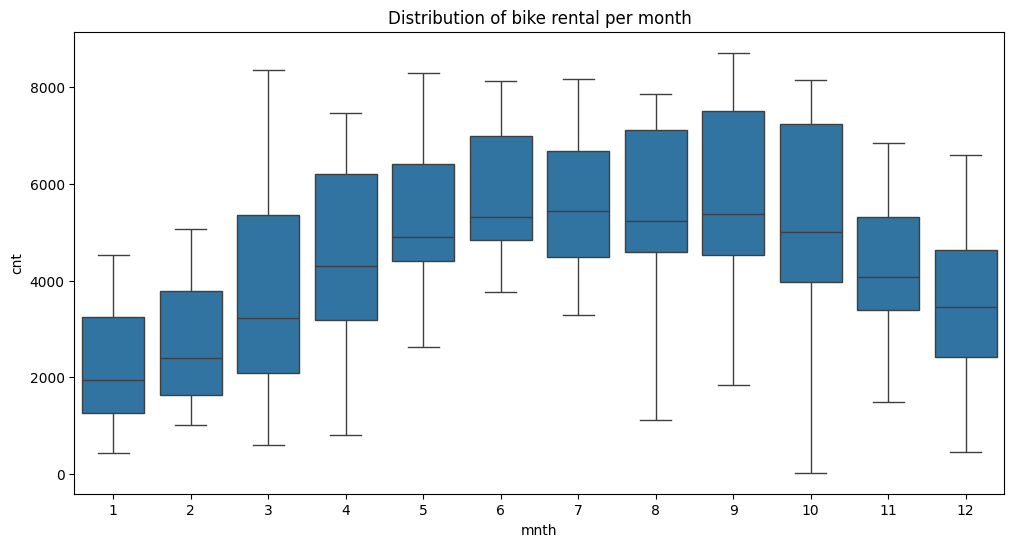

In [71]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='mnth', y='cnt', data=bikes)
plt.title('Distribution of bike rental per month')


Text(0.5, 1.0, 'Count of Rentals per Month')

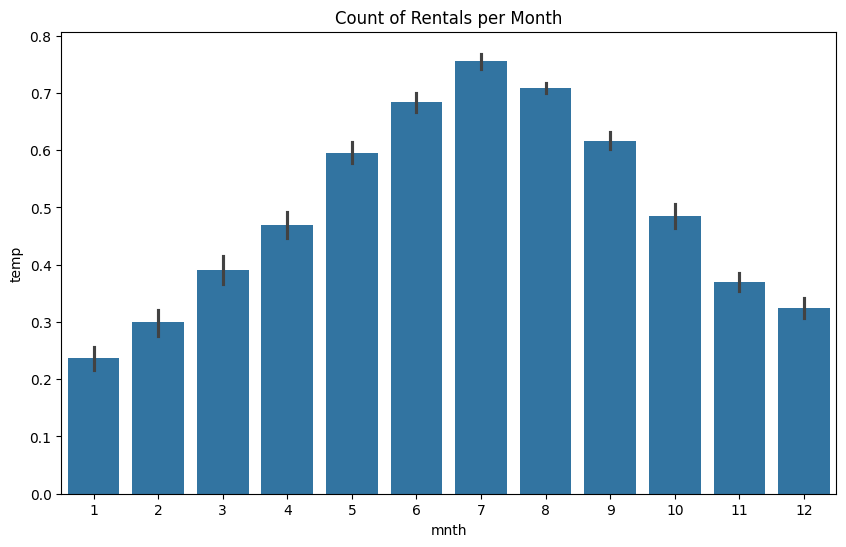

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='temp', data=bikes)
plt.title('Count of Rentals per Month')

### Visualization & Explanatory Analysis

Petanyaan 1
+ Bulan berapa puncak penyewaan sepeda terjadi?

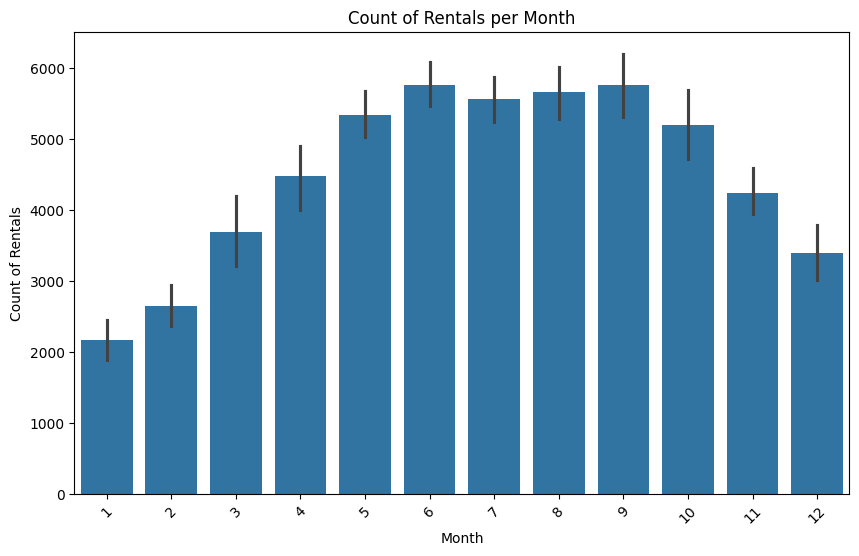

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', data=bikes)
plt.title('Count of Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Count of Rentals')
plt.xticks(rotation = 45)
plt.show()

Pada diagram batang diatas bahwa puncak penyewaan sepeda terjadi pada bulan 6-9 dengan puncaknya terjadi dibulan 9. Pada bulan 9 sepeda yang disewa diketahui sekitar 6000 lebih sepeda. Dengan begitu dapat disimpulkan bahwa puncak penyewaaan sepeda terjadi di bulan 9.

Pertanyaan 2
+ Pada musim apa orang banyak merental sepeda?

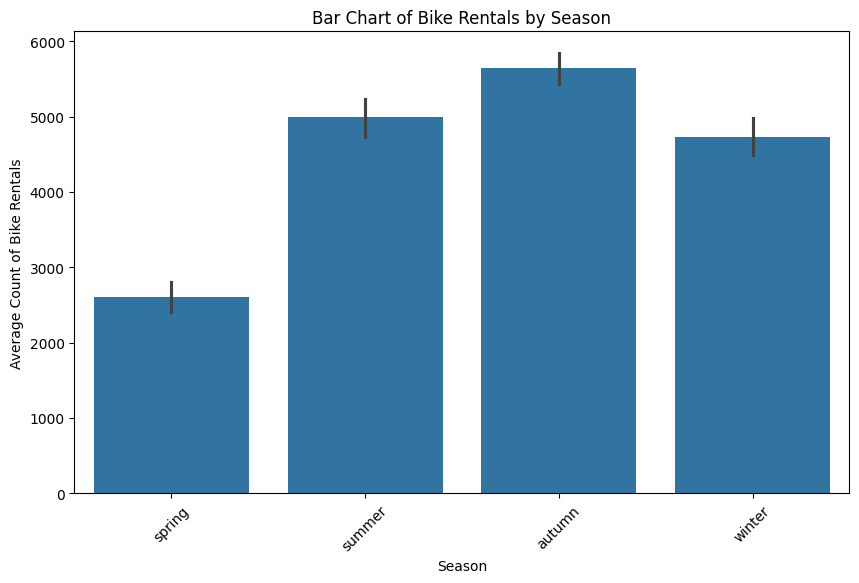

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=bikes)
plt.title('Bar Chart of Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Count of Bike Rentals')
plt.xticks(rotation = 45)
plt.show()

Musim yang paling banyak orang merental sepeda adalah musim gugur, jika dihubungka dengan temperatur kemungkinan memang musim semi adalah waktu yang tepat untuk merental sepeda

Pertanyaan 3
+ Bagaimana pengaruh banyaknya penyewa terhadap suhu udara?

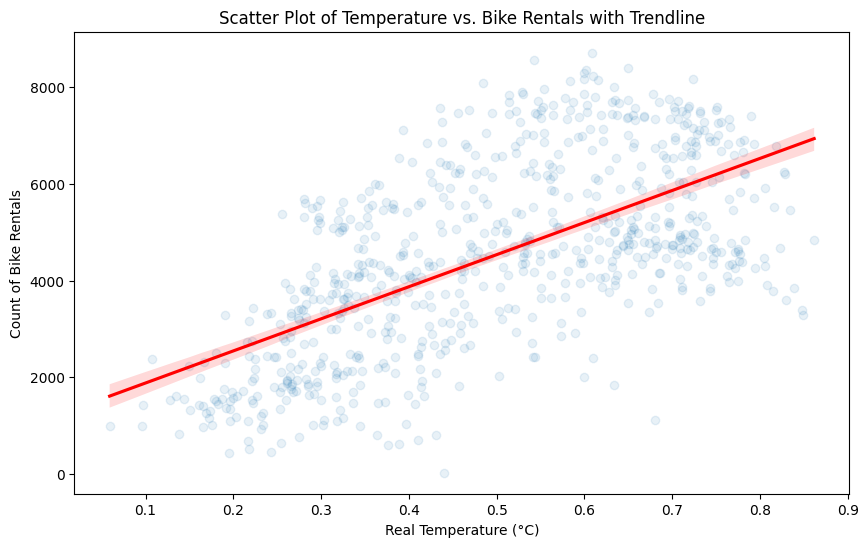

In [75]:
plt.figure(figsize = (10, 6))
sns.regplot(x = 'temp', y = 'cnt', data = bikes, scatter_kws = {'alpha':0.1}, line_kws = {'color': 'red'})
plt.title('Scatter Plot of Temperature vs. Bike Rentals with Trendline')
plt.xlabel('Real Temperature (°C)')
plt.ylabel('Count of Bike Rentals')
plt.show()

Dari grafik scater plot diatas dapat diketahui bahwa semakin tinggi suhuh udara semakin banyak juga penyewa/orang yang merental sepeda. Dari suhu udara 1°C-9°C grafik menunjukan adanya kenaikan, namun pada suhu 7°C perental lebih banyak merental

### Conclusion
+ Bulan berapa puncak penyewaan sepeda terjadi?
Dapat kita lihat pada diagram batang diatas bahwa puncak penyewaan sepeda terjadi pada bulan 6-9 dengan puncaknya terjadi dibulan 9. Pada bulan 9 sepeda yang disewa diketahui sekitar 6000 lebih sepeda. Dengan begitu dapat disimpulkan bahwa puncak penyewaaan sepeda terjadi di bulan 9.

+ Pada musim apa orang banyak merental sepeda?
Pada musim gugur orang orang cendenrung merental sepeda. Dibandingkan dengan musim lainnya yaitu musim panas, dingin dan semi. Pada musim semi total orang merental sepeda diketahui lebih dari 5000, sedangkan pada musim semi hanya ada lebih dari 2000 sepeda yang dirental 

+ Bagaimana pengaruh banyaknya penyewa terhadap suhu udara?
Dari grafik scater plot diatas dapat diketahui bahwa semakin tinggi suhuh udara semakin banyak juga penyewa/orang yang merental sepeda. Dari suhu udara 1°C-9°C grafik menunjukan adanya kenaikan, namun pada suhu 7°C perental lebih banyak merental sepeda tersebut.

+ Jadi dapat disimpulkan bahwa bulan 6-9 adalah bulan yang memang paling banyak orang merental sepeda dikarenakan musim yang memang cocok untuk merental sepeda yaitu musim semi dan temperatur udara juga hangat yang mana tidak terlalu dingin dan tidak terlalu panas untuk berpergian menggunakan sepeda yang dirental.